In [1]:
##%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
def RungeKutta4(func,M,t,H):
    arr = np.zeros((len(t),len(M)))
    arr[0] = M
    for n in range(0,len(t)-1):
        k1 = H *func(t[n],arr[n])
        k2 =  H * func(t[n] + (H/2),arr[n] + (H * (k1/2)))
        k3 = func(t[n] + (H/2),arr[n] + (H * (k2/2)))
        k4 =  func(t[n]+ H,arr[n] + (H * k3))
        arr[n+1] =  arr[n] + (1/6)* H * ( k1 + 2*k2 + 2*k3 + k4)
    return arr

In [21]:
def plotter3DSlopeField(t,model):
    H =  t[1] - t[0]
    fig =  plt.figure(figsize=(10,8))
    ax =  plt.axes(projection="3d")
    for x0 in np.linspace(-1,1,10):
        for y0 in np.linspace(-1,1,10):
            for z0 in np.linspace(-1,1,10):
                c  = [x0,y0,z0]
                Z =  RungeKutta4(model,c,t,H)
                x,y,z =  Z.T
                ax.plot3D(x, y, z)
    # Make the grid
    X, Y, Z = np.meshgrid(np.arange(-20, 20, 0.2),np.arange(-20, 20, 0.2),np.arange(-1, 40, 0.8))
    sigma =  10
    b =  8/3
    r  = 28
    # Make the direction data for the arrows
    u = sigma* ( Y - X )
    v = r* X  - X*Z
    w = X*Y - b*Z
    ax.quiver(X, Y, Z, u, v, w, length=0.1, normalize=True)
    ax.set_xlabel(r'$x(t)$')
    ax.set_ylabel(r'$y(t)$')
    ax.set_zlabel(r'$z(t)$')
    ax.set_title("Lorenz Attractor")
    plt.show()
def plotter3D(t,model):
    H =  t[1] - t[0]
    fig =  plt.figure(figsize=(10,8))
    ax =  plt.axes(projection="3d")
    for x0 in np.linspace(-1,1,10):
        for y0 in np.linspace(-1,1,10):
            for z0 in np.linspace(-1,1,10):
                c  = [x0,y0,z0]
                Z =  RungeKutta4(model,c,t,H)
                x,y,z =  Z.T
                ax.plot3D(x, y, z)
    ax.set_xlabel(r'$x(t)$')
    ax.set_ylabel(r'$y(t)$')
    ax.set_zlabel(r'$z(t)$')
    ax.set_title("Lorenz Attractor")
    plt.show()

In [10]:
# def lorenz(t,w):
#     x,y,z = w
#     sigma =  10
#     b =  8/3
#     r  = 28
#     dxdt =  sigma* ( y - x )
#     dydt  =  r* x  -  y  - x*z
#     dzdt =  x*y - b*z
#     return np.array([dxdt,dydt,dzdt])

def lorenz(t,w, s=10, r=28, b=2.667):
    """
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    """
    x,y,z = w
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([x_dot, y_dot, z_dot])

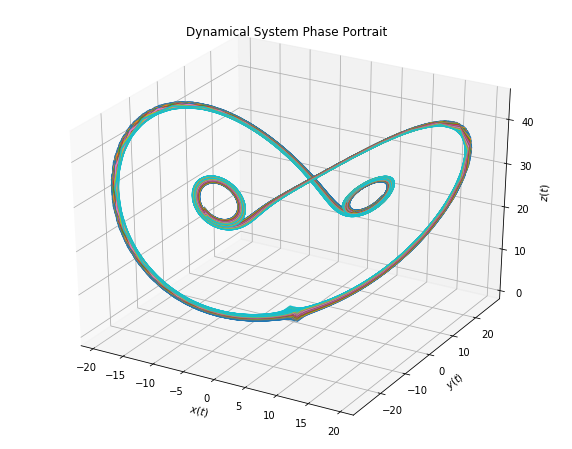

In [14]:
t =  np.linspace(0,4,100)
plotter3D(t,lorenz)

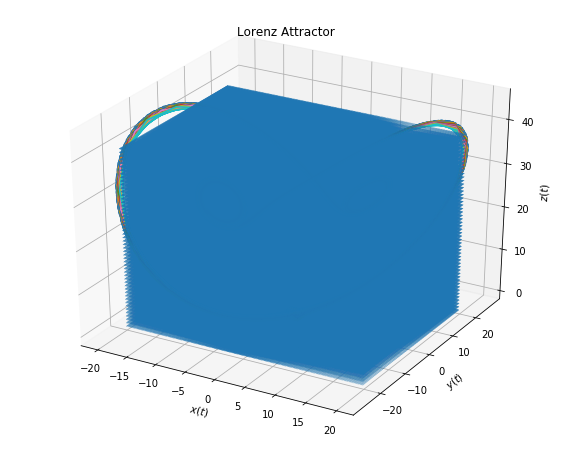

In [22]:
plotter3DSlopeField(t,lorenz)